# Project 2 - Ames Housing Data and Kaggle Challenge

# PROBLEM STATEMENT

**Predict the price of home sale for the Aimes Iowa Housing Dataset**
In this project we are tasked with making sales price predictions for house in Ames, Iowa, United States based on features given in the dataset.<br>
<br>
The class was provided with a training dataset (train.csv) and test dataset (test.csv). The training dataset includes the target variable (sale price). We were assigned the challenge of generating a regression model using the training data, predicting values for the target using the test data, and submitting our predictions to the private Kaggle competition for the class to be scored against the actual target values. The preliminary scores given during the competition are based on only 30% of the test data. At the conclusion of the competition, the final submissions are scored against the remaining 70% of the test data. (This is to discourage overfitting the model to the data used for preliminary scores.)

# 0.1 Train Data Cleaning

## Table of contents

- [1.Train Data Import & Cleaning](#1.-Train-Data-Import-&-Cleaning)<br>
In order to keep the train datasets as complete as posible, we will fill null values and impute values into the missing value cells.
 >[1.1 Lot Frontage](#1.1-Lot-Frontage)<br>
 >[1.2 Alley](#1.2-Alley)<br>
 >[1.3 Mas Vnr](#1.3-Mas-Vnr)<br>
 >[1.4 Basement](#1.4-Basement)<br>
 >[1.5 Basement Bathroom](#1.5-Basement-Bathroom)<br>
 >[1.6 Fireplace Quality](#1.6-Fireplace-Quality)<br>
 >[1.7 Garage](#1.7-Garage)<br>
 >[1.8 Fence](#1.8-Fence)<br>
 >[1.9 Pool QC](#1.9-Pool-QC)<br>
 >[1.10 Misc Feature](#1.10-Misc-Feature)<br>
- [2.Feature Engineering For Categorical Variables](#2.-Feature-Engineering-For-Categorical-Variables])

# 1. Train Data Import & Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

#to display all the columns in the dataset
pd.set_option('display.max_columns', None)
# To display first 300 rows in the dataset
pd.set_option('display.max_rows', 300)

%matplotlib inline

In [2]:
# import train datasets
train_df = pd.read_csv("../datasets/train.csv")

In [3]:
# check the shape of the dataset
print(train_df.shape)

(2051, 81)


In [4]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

> There are columns that having null values, next we need to identify which is features need data cleaning and imputation to fill all the null values with different method. 

In [6]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
Overall Cond         0
Exterior 2nd         0
Exterior 1st         0
Roof Matl            0
dtype: int64

> The Pool QC has the highest count of null values which is over 90% datas are missing, Miscellaneous features is second highest among the house feature with 1986 of missing values, alley having 1911 missing values, fence 1651 missing values and fireplace quality has 1000 missing values. But this cannot be explain as the data are missing, it can be explained that the house did not have the features. So below we will use different method to replace the null value into the nan cells.

In [7]:
na_features =[x for x in train_df.columns if train_df[x].isnull().sum()>1]
for x in na_features:
    print(x,np.round(train_df[x].isnull().mean(),4),' %')

Lot Frontage 0.1609  %
Alley 0.9317  %
Mas Vnr Type 0.0107  %
Mas Vnr Area 0.0107  %
Bsmt Qual 0.0268  %
Bsmt Cond 0.0268  %
Bsmt Exposure 0.0283  %
BsmtFin Type 1 0.0268  %
BsmtFin Type 2 0.0273  %
Bsmt Full Bath 0.001  %
Bsmt Half Bath 0.001  %
Fireplace Qu 0.4876  %
Garage Type 0.0551  %
Garage Yr Blt 0.0556  %
Garage Finish 0.0556  %
Garage Qual 0.0556  %
Garage Cond 0.0556  %
Pool QC 0.9956  %
Fence 0.805  %
Misc Feature 0.9683  %


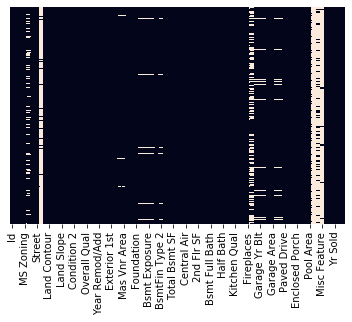

In [8]:
#Plot heatmap to see which features having null values, white color in the heatmap indicate the null values.
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False);

In [9]:
#Change the features name to lowercass and replace the space with '_'

train_df.columns = train_df.columns.map(lambda x: x.replace(' ', '_'))
train_df.columns = train_df.columns.map(lambda x: x.lower())

In [10]:
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# 1.1 Lot Frontage

Identify the null value in lot frontage feature and fill with 'na' in the cells.

In [11]:
# https://www.gimme-shelter.com/frontage-50043/
# the lot frontage might be a main contributor to the price difference so considered to change null to median of same subclass and lot shape

train_df['lot_frontage'] = train_df.groupby(['ms_subclass','lot_shape'])['lot_frontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
# check if there is null remain in the Lot Frontage columns
train_df.loc[train_df['lot_frontage'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
430,1848,533223050,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,239.0,Unf,0.0,312.0,551.0,GasA,Ex,Y,SBrkr,551,551,0,1102,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,Unf,2.0,480.0,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,148800
1515,2731,905351045,150,RL,NaN,1700,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,Twnhs,1.5Fin,7,5,1980,1981,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,397.0,Unf,0.0,33.0,430.0,GasA,TA,Y,SBrkr,880,680,140,1700,1.0,0.0,2,1,2,1,Gd,7,Typ,0,NaN,Basment,1980.0,Fin,1.0,450.0,Gd,TA,Y,188,36,0,0,200,0,NaN,NaN,NaN,0,4,2006,WD,148400
1721,1429,906424010,80,RL,NaN,11454,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,SLvl,8,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,302.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,770.0,Unf,0.0,631.0,1401.0,GasA,Ex,Y,SBrkr,1511,0,0,1511,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1995.0,Fin,3.0,811.0,TA,TA,Y,168,42,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,225000
1735,1928,535181030,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,6,3,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,1237.0,Unf,0.0,420.0,1657.0,GasA,Gd,Y,SBrkr,1657,0,0,1657,0.0,1.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1970.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,147,0,NaN,NaN,NaN,0,3,2007,WD,163500


In [13]:
train_df['lot_frontage'].fillna(train_df['lot_frontage'].median(),inplace=True)

# 1.2 Alley

Identify the null value in alley feature and fill with 'na' in the cells.

In [14]:
train_df['alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [15]:
train_df['alley'].fillna('na',inplace=True)

In [16]:
train_df['alley'].isnull().sum()

0

# 1.3 Mas Vnr

1. Identify the null value in mas_vnr_type feature and fill with 'na' in the cells.
2. Identify the null value in mas_vnr_area feature and fill with 0 in the cells.
3. There are a few rows that the mas vnr is not available but having mas vnr area, filter out and replace the value to 0.

In [17]:
train_df['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [18]:
train_df['mas_vnr_type'].fillna('na',inplace=True)

In [19]:
train_df['mas_vnr_area'].fillna(0.0,inplace=True)

In [20]:
#Cross reference to identify the rows that mas_vnr_type = None but there is value > 0 in mas_vnr_area
train_df.loc[(train_df['mas_vnr_area']>0) & (train_df['mas_vnr_type']=='None')]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
765,1862,533352075,90,RL,73.0,18890,Pave,na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,190000
810,2529,534129230,60,RL,80.0,10400,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247.0,Unf,0.0,485.0,732.0,GasA,Gd,Y,SBrkr,1012,778,0,1790,1.0,0.0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2.0,484.0,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,165150
1148,1914,535106140,20,RL,70.0,10150,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,912,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,114500
1684,2004,902427140,20,RM,52.0,8626,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,1.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,104500
1832,364,527166010,60,RL,74.0,10762,Pave,na,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694.0,Unf,0.0,284.0,978.0,GasA,Ex,Y,SBrkr,1005,978,0,1983,0.0,0.0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2.0,490.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,225000


In [21]:
train_df.iloc[[765],27] = train_df.iloc[[765],27].replace(1.0,0.0)
train_df.iloc[[810],27] = train_df.iloc[[810],27].replace(288.0,0.0)
train_df.iloc[[1148],27] = train_df.iloc[[1148],27].replace(1.0,0.0)
train_df.iloc[[1684],27] = train_df.iloc[[1684],27].replace(1.0,0.0)
train_df.iloc[[1832],27] = train_df.iloc[[1832],27].replace(344.0,0.0)

In [22]:
train_df.loc[(train_df['bsmt_exposure'].isnull()) & (train_df['bsmt_qual'].notnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1456,1797,528458090,60,FV,81.0,10411,Pave,na,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,na,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


In [23]:
train_df.iloc[[1456],33] = train_df.iloc[[1456],33].fillna('no')
train_df.iloc[[1547],33] = train_df.iloc[[1547],33].fillna('no')
train_df.iloc[[1997],33] = train_df.iloc[[1997],33].fillna('no')

# 1.4 Basement

1. Identify the null value in bsmt_exposure feature and fill with 'na' in the cells.
2. Identify the null value in bsmtfin_type_1,bsmtfin_type_2, bsmt_cond & bsmt_qual feature and fill with 'na' in the cells.
3. Identify the null value in bsmtfin_sf_1, bsmtfin_sf_2, bsmt_unf_sf, total_bsmt_sf feature and fill with 0 in the cells.

In [24]:
train_df.loc[(train_df['bsmt_exposure'].isnull()) & (train_df['bsmt_qual'].isnull())].shape

(55, 81)

In [25]:
train_df['bsmt_exposure'].fillna('na',inplace=True)

In [26]:
train_df.loc[(train_df['bsmtfin_type_1'].isnull()) & (train_df['bsmt_qual'].isnull())].shape

(55, 81)

In [27]:
train_df['bsmtfin_type_1'].fillna('na',inplace=True)

In [28]:
train_df.loc[train_df['bsmtfin_sf_1'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,na,na,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [29]:
train_df['bsmtfin_sf_1'].fillna(0.0,inplace=True)

In [30]:
train_df.loc[(train_df['bsmtfin_type_2'].isnull()) & (train_df['bsmt_qual'].notnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1147,445,528142130,20,RL,85.0,10655,Pave,na,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000


In [31]:
train_df.groupby(['bsmt_qual','bsmtfin_type_1'])['bsmtfin_type_2'].apply(stats.mode)

bsmt_qual  bsmtfin_type_1
Ex         ALQ                 ([Unf], [3])
           GLQ               ([Unf], [139])
           LwQ                 ([ALQ], [1])
           Rec                 ([GLQ], [1])
           Unf                ([Unf], [37])
Fa         ALQ                 ([Unf], [4])
           BLQ                 ([Unf], [3])
           LwQ                 ([Unf], [9])
           Rec                 ([Unf], [4])
           Unf                ([Unf], [38])
Gd         ALQ                ([Unf], [84])
           BLQ                ([Unf], [20])
           GLQ               ([Unf], [379])
           LwQ                 ([GLQ], [8])
           Rec                ([Unf], [20])
           Unf               ([Unf], [262])
Po         Unf                 ([Unf], [1])
TA         ALQ               ([Unf], [135])
           BLQ               ([Unf], [120])
           GLQ                ([Unf], [51])
           LwQ                ([Unf], [48])
           Rec               ([Unf], [120])
      

In [32]:
train_df.iloc[[1147],[36]] = train_df.iloc[[1147],[36]].fillna('unf')
train_df['bsmtfin_type_2'].fillna('na',inplace=True)

In [33]:
train_df.loc[train_df['bsmtfin_sf_2'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,na,na,0.0,na,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [34]:
train_df['bsmtfin_sf_2'].fillna(0.0,inplace=True)

In [35]:
train_df.loc[train_df['bsmt_unf_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,na,na,0.0,na,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [36]:
train_df['bsmt_unf_sf'].fillna(0.0,inplace=True)

In [37]:
train_df.loc[train_df['total_bsmt_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,na,na,0.0,na,0.0,0.0,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [38]:
train_df['total_bsmt_sf'].fillna(0.0,inplace=True)

In [39]:
train_df.loc[train_df['bsmt_cond'].isnull()].shape

(55, 81)

In [40]:
train_df['bsmt_cond'].fillna('na',inplace=True)

In [41]:
train_df['bsmt_qual'].fillna('na',inplace=True)

# 1.5 Basement Bathrooms

1. Identify the null value in bsmt_full_bath, bsmt_half_bath feature and fill with 0 in the cells.

In [42]:
train_df.loc[train_df['bsmt_full_bath'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,na,na,na,na,0.0,na,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,na,na,na,na,0.0,na,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [43]:
train_df['bsmt_full_bath'].fillna(0.0,inplace=True)

In [44]:
train_df.loc[train_df['bsmt_half_bath'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,na,na,na,na,0.0,na,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,na,na,na,na,0.0,na,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [45]:
train_df['bsmt_half_bath'].fillna(0.0,inplace=True)

# 1.6 Fireplace Quality

1.Identify the null value in fireplace_qu feature and fill with 'na in the cells.

In [46]:
train_df.loc[(train_df['fireplace_qu'].isnull()) & (train_df['fireplaces'] == 0)].shape

(1000, 81)

In [47]:
train_df['fireplace_qu'].fillna('na',inplace=True)

# 1.7 Garage

1. Identify the null value in garage_type, garage_finish, garage_qual, garage_cond feature and fill with 'na' in the cells.
2. Identify the null value in garage_yr_blt, garage_cars feature and fill with 0 in the cells.

In [48]:
train_df.loc[(train_df['garage_type'].notnull()) & (train_df['garage_qual'].isnull())]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,na,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [49]:
train_df.iloc[[1712],[59]] = train_df.iloc[[1712],[59]].replace('Detchd','na') 

In [50]:
train_df.iloc[[1712] ]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,na,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,na,na,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [51]:
train_df['garage_type'].isnull().sum()

113

In [52]:
train_df['garage_type'].fillna('na',inplace=True)

In [53]:
train_df['garage_yr_blt'].fillna(0.0,inplace=True)
train_df['garage_yr_blt'] = train_df['garage_yr_blt'].astype(float)

In [54]:
train_df['garage_finish'].fillna('na',inplace=True)

In [55]:
train_df['garage_cars'].fillna('na',inplace=True)

In [56]:
train_df['garage_area'].fillna(0.0,inplace=True)
train_df['garage_area'] = train_df['garage_area'].astype(float)

In [57]:
train_df['garage_qual'].fillna('na',inplace=True)

In [58]:
train_df['garage_cond'].fillna('na',inplace=True)

# 1.8 Fence

1. Identify the null value in fence feature and fill with 'na' in the cells.

In [59]:
train_df['fence'].fillna('na',inplace=True)

# 1.9 Pool QC

1. Identify the null value in pool_qc feature and fill with 'na' in the cells.

In [60]:
train_df['pool_qc'].fillna('na',inplace=True)

# 1.10 Misc Feature

1. Identify the null value in misc_feature feature and fill with 'na' in the cells.

In [61]:
#cross checking misc feature & misc value
train_df.loc[(train_df['misc_feature'].isnull()) & (train_df['misc_val'] != 0)].shape

(0, 81)

In [62]:
train_df['misc_feature'].fillna('na',inplace=True)

# 2.Feature Engineering For Categorical Variables

Identify the features with categorical features and change to ordinal features to ease the data handling in features and modeling phase.

In [63]:
# Print out the categorical variables for each features 

print("basement quality: ", train_df['bsmt_qual'].unique())

print("fireplace quality: ",train_df['fireplace_qu'].unique())
      
print("garage quality: ",train_df['garage_qual'].unique())

print("garage condition: ",train_df['garage_cond'].unique())

print("pool qc: ",train_df['pool_qc'].unique())

print("external quality: ",train_df['exter_qual'].unique())

print("external condition: ",train_df['exter_cond'].unique())

print("heating qc: ",train_df['heating_qc'].unique())

print("kitchen quality: ",train_df['kitchen_qual'].unique())

print("ms zoning: ",train_df['ms_zoning'].unique())

basement quality:  ['TA' 'Gd' 'Fa' 'na' 'Ex' 'Po']
fireplace quality:  ['na' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
garage quality:  ['TA' 'Fa' 'na' 'Gd' 'Ex' 'Po']
garage condition:  ['TA' 'Fa' 'na' 'Po' 'Gd' 'Ex']
pool qc:  ['na' 'Fa' 'Gd' 'Ex' 'TA']
external quality:  ['Gd' 'TA' 'Ex' 'Fa']
external condition:  ['TA' 'Gd' 'Fa' 'Ex' 'Po']
heating qc:  ['Ex' 'TA' 'Gd' 'Fa' 'Po']
kitchen quality:  ['Gd' 'TA' 'Fa' 'Ex']
ms zoning:  ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']


In [64]:
# Change the categorical variables into ordinal features.

train_df.replace({'bsmt_exposure':{'na':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}},inplace=True)

train_df.replace({'bsmt_cond':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'bsmt_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'fireplace_qu':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'garage_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'garage_cond':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'pool_qc':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'exter_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'exter_cond':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'heating_qc':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

train_df.replace({'kitchen_qual':{'na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

#simplify the MS Zoning category
train_df.replace({'ms_zoning': {'C (all)':'C','A (agr)':'A','I (all)':'I'}},inplace=True)

Once the feature replace done, check if there is any null values in cleaned dataset.

In [65]:
train_df.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

Plot heatmap to confirm all the null values are fill up respectively.

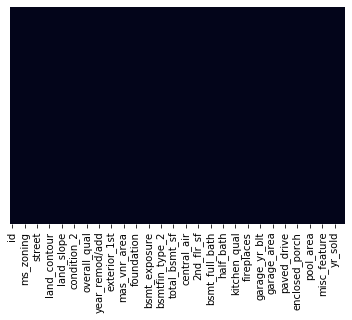

In [66]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False);

In [67]:
train_df.isnull().sum().sort_values(ascending=False).head(30)

saleprice         0
total_bsmt_sf     0
year_remod/add    0
roof_style        0
roof_matl         0
exterior_1st      0
exterior_2nd      0
mas_vnr_type      0
mas_vnr_area      0
exter_qual        0
exter_cond        0
foundation        0
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
year_built        0
overall_cond      0
overall_qual      0
lot_shape         0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage      0
lot_area          0
street            0
alley             0
dtype: int64

In [69]:
# Export the datasets as csv file
train_df.to_csv('../datasets/train_clean.csv', index=False)